In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Loaded the dataset
df = pd.read_csv('C:/Users/shett/OneDrive/Desktop/Database_Design/Final_Project/311_Service_Requests.csv', quotechar='"', encoding='unicode_escape')
df.head()


,ï»¿Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,64733927,04/24/2025 02:37:29 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10034.0,128 SEAMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.868764,-73.923244,"(40.86876366045193, -73.92324431758524)"
1,64731261,04/24/2025 01:49:23 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10314.0,625 CHELSEA ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.602584,-74.189599,"(40.602584106150985, -74.18959919654809)"
2,64732241,04/24/2025 01:49:10 AM,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11214.0,8648 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.606380,-74.003583,"(40.606380042715465, -74.00358338771072)"
3,64733368,04/24/2025 01:48:48 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11228.0,1401 CROPSEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.607598,-74.016898,"(40.607597545588604, -74.01689805211856)"
4,64737184,04/24/2025 01:48:04 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,127 WESTCHESTER SQUARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840268,-73.842481,"(40.8402684755769, -73.84248128263012)"


In [26]:
df.columns


Index(['ï»¿Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [27]:
df[['Agency', 'Complaint Type']].isnull().sum()


Agency            0
Complaint Type    0
dtype: int64

In [28]:
df_clean = df.dropna(subset=['Agency', 'Complaint Type'])


In [29]:
complaints_by_agency = df_clean.groupby(['Agency', 'Complaint Type']).size().reset_index(name='Complaint Count')

# Checking few rows
complaints_by_agency.head()


,Agency,Complaint Type,Complaint Count
0,DCWP,Consumer Complaint,4876
1,DEP,Air Quality,3151
2,DEP,Asbestos,254
3,DEP,Hazardous Materials,477
4,DEP,Industrial Waste,199


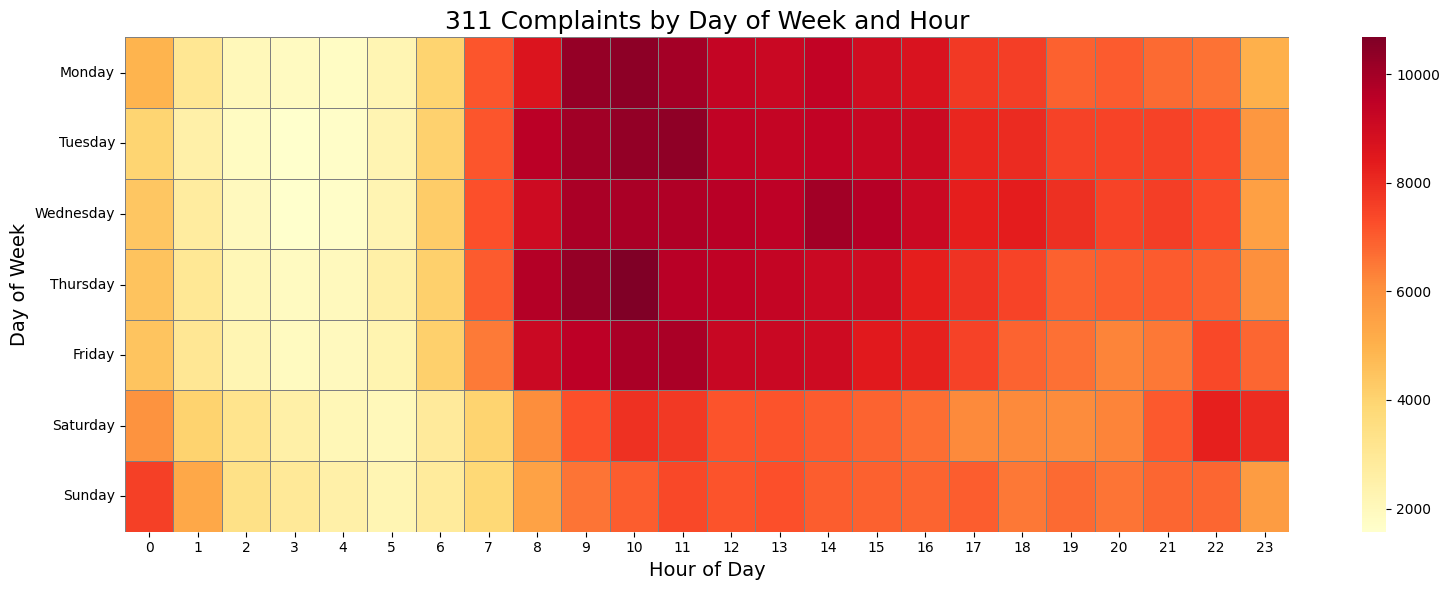

In [31]:
# Step 1: Convert Created Date to datetime if not already
df_clean['Created Date'] = pd.to_datetime(df_clean['Created Date'], errors='coerce')

# Step 2: Extract Day of Week and Hour
df_clean['Day of Week'] = df_clean['Created Date'].dt.day_name()  # Monday, Tuesday, etc.
df_clean['Hour'] = df_clean['Created Date'].dt.hour

# Step 3: Group and pivot table
heatmap_data = df_clean.groupby(['Day of Week', 'Hour']).size().reset_index(name='Complaint Count')

# Step 4: Reorder days to start from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data['Day of Week'] = pd.Categorical(heatmap_data['Day of Week'], categories=days_order, ordered=True)

# Pivot into matrix for heatmap
heatmap_matrix = heatmap_data.pivot(index='Day of Week', columns='Hour', values='Complaint Count').fillna(0)

# Step 5: Plot the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=.5, linecolor='gray')

plt.title('311 Complaints by Day of Week and Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.tight_layout()
plt.show()